In [1]:
# importation of libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline 
import datetime
import warnings

In [2]:
# Apply the configuration to Matplotlib
warnings.filterwarnings('ignore')

sns.set_theme(context='notebook',
              style='white',
              palette='deep',
              font='Lucida Calligraphy',
              font_scale=1.5,
              color_codes=True,
              rc=None)
config = {
    'figure.figsize': (14, 8),
    'figure.facecolor': '#F0F8FF',
    'figure.titlesize': 'medium',
    'figure.dpi': 50,
    'figure.edgecolor': 'green',
    'figure.frameon': True,

    "figure.autolayout": True,

    'axes.facecolor': '#F5F5DC',
    'axes.titlesize': 25,
    "axes.titleweight": 'normal',
    "axes.titlecolor": 'Olive',
    'axes.edgecolor': 'pink',

    "axes.linewidth": 2,
    "axes.grid": True,
    'axes.titlelocation': 'center',
    "axes.labelsize": 20,
    "axes.labelpad": 2,
    'axes.labelweight': 1,
    "axes.labelcolor": 'Olive',
    "axes.axisbelow": False,
    'axes.xmargin': .2,
    "axes.ymargin": .2,
    "xtick.bottom": True,
    'xtick.color': '#A52A2A',
    "ytick.left": True,
    'ytick.color': '#A52A2A',
    'grid.color': 'green',
    'grid.linestyle': '--',
    'grid.linewidth': .5,
    'grid.alpha': .3,
    'legend.loc': 'best',
    'legend.facecolor': 'NavajoWhite',
    'legend.edgecolor': 'pink',
    'legend.shadow': True,
    'legend.fontsize': 20,
    'font.family': 'Lucida Calligraphy',
    'font.size': 14,
}
plt.rcParams.update(config)
pd.set_option('display.max_columns',None)

In [3]:
# Transformer data overview
tf = pd.read_csv('Overview.csv')
display(tf.shape) 
tf.head()

(20316, 8)

DeviceTimeStamp  OTI  WTI  ATI   OLI  OTI_A  OTI_T  MOG_A
0  2019-06-25T13:06  0.0  0.0  0.0  37.0    0.0    0.0    0.0
1  2019-06-25T13:09  0.0  0.0  0.0  37.0    0.0    0.0    0.0
2  2019-06-27T10:49  0.0  0.0  0.0  38.0    0.0    0.0    0.0
3  2019-06-27T10:51  0.0  0.0  0.0  38.0    0.0    0.0    0.0
4  2019-06-27T10:52  0.0  0.0  0.0  39.0    0.0    0.0    0.0

In [4]:
# Converting to datetime datatype
tf['DeviceTimeStamp'] = pd.to_datetime(tf['DeviceTimeStamp'], format='%Y-%m-%dT%H:%M')

tf.head()

DeviceTimeStamp  OTI  WTI  ATI   OLI  OTI_A  OTI_T  MOG_A
0 2019-06-25 13:06:00  0.0  0.0  0.0  37.0    0.0    0.0    0.0
1 2019-06-25 13:09:00  0.0  0.0  0.0  37.0    0.0    0.0    0.0
2 2019-06-27 10:49:00  0.0  0.0  0.0  38.0    0.0    0.0    0.0
3 2019-06-27 10:51:00  0.0  0.0  0.0  38.0    0.0    0.0    0.0
4 2019-06-27 10:52:00  0.0  0.0  0.0  39.0    0.0    0.0    0.0

In [5]:
# transformer current and voltage overview
cv = pd.read_csv('CurrentVoltage.csv')
display(cv.shape)
cv.head()

(19352, 11)

DeviceTimeStamp    VL1    VL2    VL3  IL1  IL2  IL3  VL12  VL23  VL31  \
0  2019-06-25T13:06    0.0    0.0    0.0  0.0  0.0  0.0   0.0   0.0   0.0   
1  2019-06-27T10:49  238.7  238.7  238.8  0.0  0.0  0.0   0.0   0.0   0.0   
2  2019-06-27T10:51  238.4  238.5  238.5  0.0  0.0  0.0   0.0   0.0   0.0   
3  2019-06-27T10:52  239.9  240.0  240.0  0.0  0.0  0.0   0.0   0.0   0.0   
4  2019-06-27T10:52  239.9  240.0  240.0  0.0  0.0  0.0   0.0   0.0   0.0   

   INUT  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0

<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">Converting to datetime datatype
</span>

In [6]:
# Converting to datetime datatype
cv['DeviceTimeStamp'] = pd.to_datetime(cv['DeviceTimeStamp'], format='%Y-%m-%dT%H:%M')
cv.head()

DeviceTimeStamp    VL1    VL2    VL3  IL1  IL2  IL3  VL12  VL23  VL31  \
0 2019-06-25 13:06:00    0.0    0.0    0.0  0.0  0.0  0.0   0.0   0.0   0.0   
1 2019-06-27 10:49:00  238.7  238.7  238.8  0.0  0.0  0.0   0.0   0.0   0.0   
2 2019-06-27 10:51:00  238.4  238.5  238.5  0.0  0.0  0.0   0.0   0.0   0.0   
3 2019-06-27 10:52:00  239.9  240.0  240.0  0.0  0.0  0.0   0.0   0.0   0.0   
4 2019-06-27 10:52:00  239.9  240.0  240.0  0.0  0.0  0.0   0.0   0.0   0.0   

   INUT  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0

<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">Merge both dataframes along DeviceTimeStamp
</span>

In [7]:
# Merge both dataframes along DeviceTimeStamp
transformer = pd.merge(tf, cv, on='DeviceTimeStamp', how='outer')
transformer.sample(5)

DeviceTimeStamp   OTI  WTI   ATI    OLI  OTI_A  OTI_T  MOG_A    VL1  \
2352  2019-07-03 15:17:00  29.0  0.0  30.0   39.0    1.0    0.0    0.0    NaN   
18085 2020-02-20 20:45:00  26.0  1.0  24.0  100.0    0.0    0.0    0.0  246.1   
2122  2019-06-29 16:40:00  33.0  0.0  33.0   39.0    0.0    0.0    0.0  245.1   
17756 2020-02-17 14:00:00  32.0  1.0  30.0  100.0    0.0    0.0    0.0  244.3   
7124  2019-09-05 06:15:00  30.0  0.0  28.0   43.0    0.0    0.0    0.0  242.0   

         VL2    VL3   IL1   IL2    IL3   VL12   VL23   VL31  INUT  
2352     NaN    NaN   NaN   NaN    NaN    NaN    NaN    NaN   NaN  
18085  244.9  244.5  88.3  85.0  116.2  424.8  423.4  426.4  29.5  
2122   245.1  245.2   0.0   0.0    0.0    0.0    0.0    0.0   0.0  
17756  243.6  241.9  91.9  57.5  103.9  422.8  420.0  422.4  41.7  
7124   242.1  241.3  57.3  34.5   69.1  418.7  417.6  418.5  30.1

<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Transformer Parameter Visualization</span>

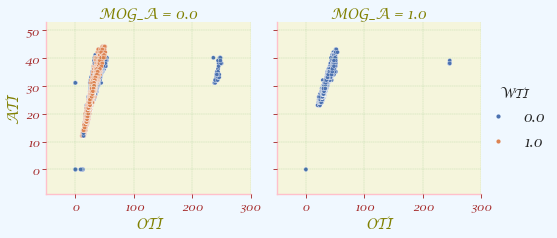

In [8]:
sns.relplot(data=tf, x="OTI", y="ATI", hue="WTI",col="MOG_A")

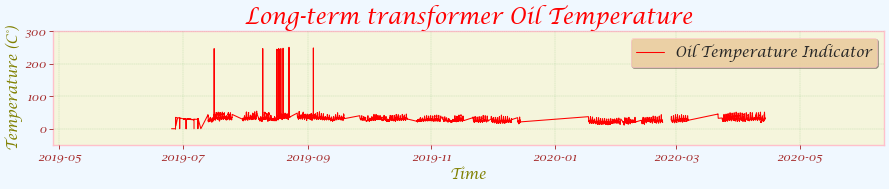

In [9]:
# Oil Temperature
plt.figure(figsize=(18,4))

plt.plot(transformer.DeviceTimeStamp, transformer.OTI, label="Oil Temperature Indicator",color='red')
plt.title("Long-term transformer Oil Temperature",fontsize = 30,color='Red')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Temperature (C°)")
plt.show() 

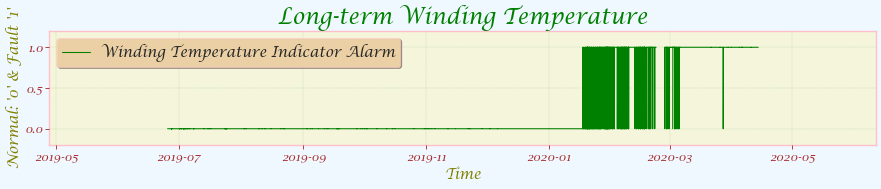

In [10]:
# Winding Temperature Indicator Alarm
plt.figure(figsize=(18,4))

plt.plot(transformer.DeviceTimeStamp, transformer.WTI, label="Winding Temperature Indicator Alarm",color='green')
plt.title("Long-term Winding Temperature",fontsize = 30,color='Green')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Normal: '0' & Fault '1'")
plt.show() 

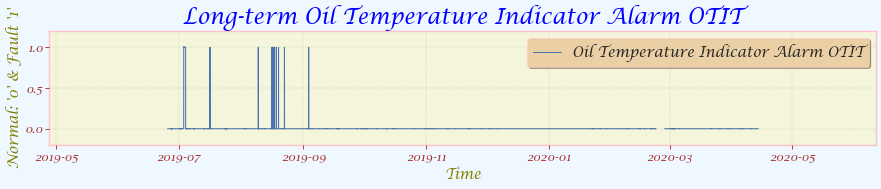

In [11]:
# Oil Temperature Indicator Alarm OTIT

plt.figure(figsize=(18,4))
plt.plot(transformer.DeviceTimeStamp, transformer.OTI_A, label="Oil Temperature Indicator Alarm OTIT")
plt.title("Long-term Oil Temperature Indicator Alarm OTIT",fontsize = 30,color='Blue')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Normal: '0' & Fault '1'")
plt.show() 

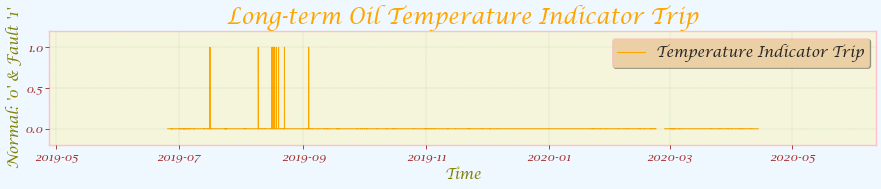

In [12]:
plt.figure(figsize=(18,4))
plt.plot(transformer.DeviceTimeStamp, transformer.OTI_T, label="Temperature Indicator Trip",color='Orange')
plt.title("Long-term Oil Temperature Indicator Trip",fontsize = 30,color='Orange')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Normal: '0' & Fault '1'")
plt.show() 

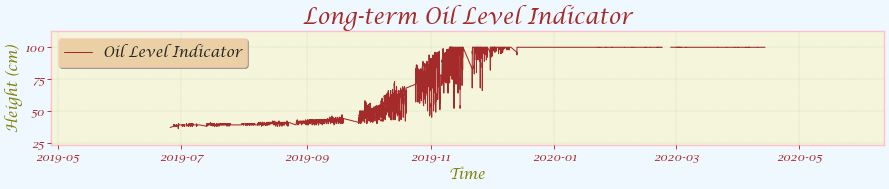

In [13]:
plt.figure(figsize=(18,4))
plt.plot(transformer.DeviceTimeStamp, transformer.OLI, label="Oil Level Indicator",color='Brown')
plt.title("Long-term Oil Level Indicator",fontsize = 30,color='Brown')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Height (cm)")
plt.show() 

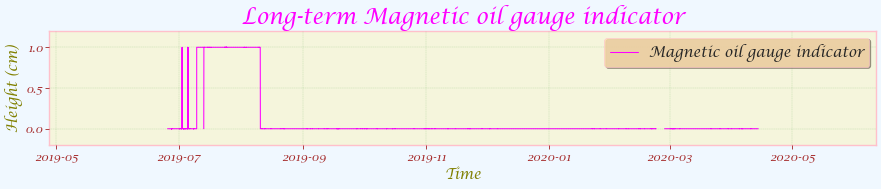

In [14]:
plt.figure(figsize=(18,4))

plt.plot(transformer.DeviceTimeStamp, transformer.MOG_A, label="Magnetic oil gauge indicator",color='Magenta')
plt.title("Long-term Magnetic oil gauge indicator",fontsize = 30,color='Magenta')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Height (cm)")
plt.show() 

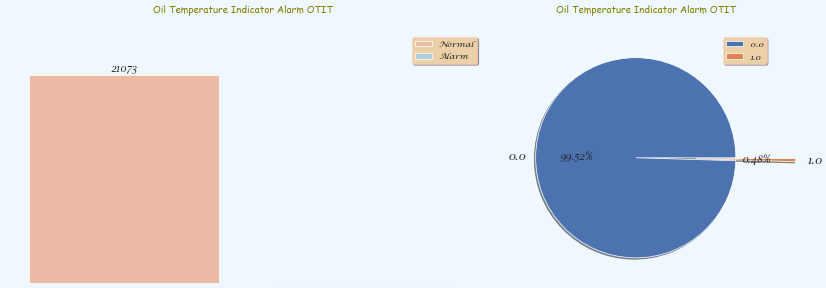

In [15]:
plt.rcParams['legend.fontsize'] = 12
plt.rcParams["axes.labelsize"] = 20

plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='OTI_A', data=transformer, palette='RdBu')
ax.bar_label(ax.containers[0])
plt.title("Oil Temperature Indicator Alarm OTIT", fontsize=20,color='Olive',font='Comic Sans MS',pad=30)
plt.legend(labels=['Normal','Alarm'])
plt.axis('off');

ax =plt.subplot(1,2,2)
ax=transformer['OTI_A'].value_counts().plot.pie(explode=[0.1, 0.5],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Oil Temperature Indicator Alarm OTIT", fontsize = 20,color='Olive',font='Comic Sans MS',pad= 30);
plt.legend()
plt.axis('off');

(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

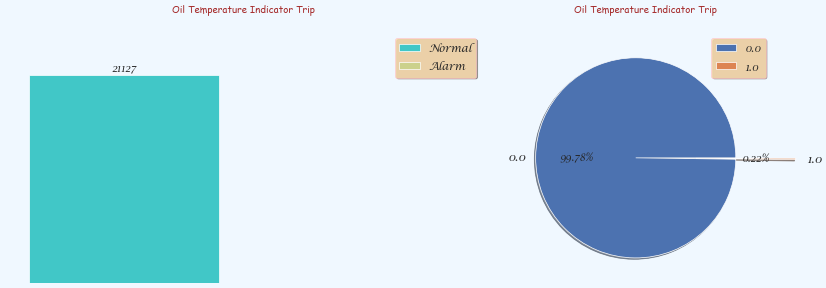

In [16]:
plt.rcParams['legend.fontsize'] = 15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.labelcolor"] = 'brown'

plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='OTI_T', data=transformer, palette='rainbow')
ax.bar_label(ax.containers[0])
plt.title("Oil Temperature Indicator Trip", fontsize=30,color='Brown',font='Comic Sans MS',pad=30)
plt.legend(labels=['Normal','Alarm'])
plt.axis('off')

ax =plt.subplot(1,2,2)
ax=transformer['OTI_T'].value_counts().plot.pie(explode=[0.1, 0.5],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Oil Temperature Indicator Trip", fontsize = 30,color='Brown',font='Comic Sans MS',pad= 30);
plt.legend()
plt.axis('off')

(np.float64(-1.25), np.float64(1.25), np.float64(-1.25), np.float64(1.25))

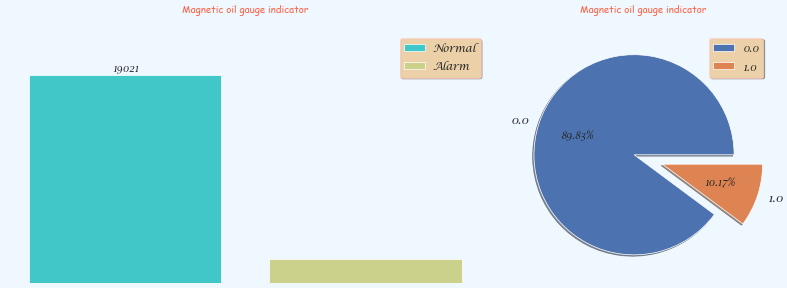

In [17]:
plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='MOG_A', data=transformer, palette='rainbow')
ax.bar_label(ax.containers[0])
plt.title("Magnetic oil gauge indicator", fontsize=30,color='Tomato',font='Comic Sans MS',pad=30)
plt.legend(labels=['Normal','Alarm'])
plt.axis('off')

ax =plt.subplot(1,2,2)
ax=transformer['MOG_A'].value_counts().plot.pie(explode=[0.1, 0.2],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Magnetic oil gauge indicator", fontsize = 30,color='Tomato',font='Comic Sans MS',pad= 30);
plt.legend()
plt.axis('off')

<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Train Test Split</span>

In [18]:
X = transformer.drop(['DeviceTimeStamp','MOG_A'],axis=1).fillna(0)

y = transformer['MOG_A'].fillna(0)


X.head()

OTI  WTI  ATI   OLI  OTI_A  OTI_T    VL1    VL2    VL3  IL1  IL2  IL3  \
0  0.0  0.0  0.0  37.0    0.0    0.0    0.0    0.0    0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  37.0    0.0    0.0    0.0    0.0    0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  38.0    0.0    0.0  238.7  238.7  238.8  0.0  0.0  0.0   
3  0.0  0.0  0.0  38.0    0.0    0.0  238.4  238.5  238.5  0.0  0.0  0.0   
4  0.0  0.0  0.0  39.0    0.0    0.0  239.9  240.0  240.0  0.0  0.0  0.0   

   VL12  VL23  VL31  INUT  
0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=21)
X_train.head()

OTI  WTI   ATI    OLI  OTI_A  OTI_T    VL1    VL2    VL3   IL1   IL2  \
12880  26.0  0.0  26.0   97.0    0.0    0.0  245.7  244.4  243.1  39.1  32.7   
13961  25.0  0.0  25.0  100.0    0.0    0.0  247.2  246.2  244.2  66.7  44.5   
617    33.0  0.0  34.0   39.0    0.0    0.0  238.7  238.7  238.8   0.0   0.0   
7449   40.0  0.0  35.0   41.0    0.0    0.0  236.7  234.9  236.3  83.6  89.0   
3816   35.0  0.0  31.0   39.0    0.0    0.0  235.2  234.1  235.3  60.9  51.5   

        IL3   VL12   VL23   VL31  INUT  
12880  51.6  424.2  422.1  424.0  19.8  
13961  61.0  427.5  425.0  426.4  19.9  
617     0.0    0.0    0.0    0.0   0.0  
7449   92.0  407.9  407.2  410.3   7.2  
3816   75.1  404.4  404.1  407.0  23.4

<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Normalizing the data</span>

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<div style="color:white;background-color:Red;padding:2%;border-radius:150px 150px;font-size:3em;text-align:center">Model Implementation</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:33px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 15px;
              color:white;">
            <b>1. RandomForestClassifier</b>
        </p>
</div>

In [21]:
model_accuracy= "Model Accuracy :"
training_accuracy="Training Accuracy :"
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt  # Import for plotting


Training Accuracy : 99.94 %
Model Accuracy : 98.76 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3848
         1.0       0.93      0.94      0.94       425

    accuracy                           0.99      4273
   macro avg       0.96      0.97      0.97      4273
weighted avg       0.99      0.99      0.99      4273

--------------------------------------------------------


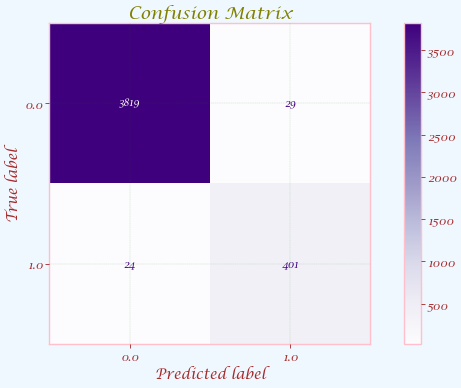

In [22]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, f1_score, precision_score

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print(training_accuracy,random_forest_train ,"%")
print(model_accuracy,random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")
# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)  # Calculate confusion matrix
# # Calculate F1-score and precision in one line
# f1 = f1_score(y_test, y_pred_rf, average='weighted')  # Weighted F1-score for all classes
# precision = precision_score(y_test, y_pred_rf)  # Weighted precision

# # Print F1-score and precision
# print(f"Weighted F1-score: {f1:.2f}")
# print(f"Weighted Precision: {precision:.2f}")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))  # Create display
disp.plot(cmap=plt.cm.Purples)  # Plot the confusion matrix using Greens colormap
plt.title('Confusion Matrix')
plt.show()  # Display the plot

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:33px;
           font-family:Nexa;
           letter-spacing:0.5px">
        <p style="padding: 15px;
              color:white;">
            <b>2. XGB Classifier</b>
        </p>
</div>

In [23]:
import xgboost as Xgb
xgb = Xgb.XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
xgb.score(X_train, y_train)

xgb_train = round(xgb.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(y_pred_xgb, y_test) * 100, 2)

print(training_accuracy,xgb_train ,"%")
print(model_accuracy,xgb_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_xgb))
print("\033[1m--------------------------------------------------------\033[0m")
# Create and display the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)  # Calculate confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))  # Create display
disp.plot(cmap=plt.cm.Greens)  # Plot the confusion matrix using Greens colormap
plt.title('Confusion Matrix')
plt.show()  # Display the plot

ModuleNotFoundError: No module named 'xgboost'

<div style="display:fill;
            border-radius:15px;
            background-color:cyan;
            font-size:270%;
            font-family:Vardana;
            letter-spacing:0.5px;
            padding:10px;
            color:Red;
            border-style: solid;
            border-color: red;
            text-align:center;">
<b>Comparing Multiple Models</b>
</div>

In [ ]:
models = pd.DataFrame({
    'Model': [
        'Random Forest','XGBClassifier'
    ],
    'Training Accuracy': [
        random_forest_train,
        xgb_train
    ],
    'Model Accuracy Score': [
        random_forest_accuracy,
        xgb_accuracy
    ]
})


In [ ]:
# pd.set_option('precision',1)
print("model accuracy table")
models.sort_values(by='Model Accuracy Score', ascending=False)


# .style.background_gradient(
#         cmap='coolwarm').hide_index().set_properties(**{
#             'font-family': 'Lucida Calligraphy',
#             'color': 'LigntGreen',
#             'font-size': '15px'
#         })

model accuracy table


Model  Training Accuracy  Model Accuracy Score
1  XGBClassifier              99.91                 98.81
0  Random Forest              99.94                 98.78

In [ ]:
models=models.sort_values(by='Model Accuracy Score',ascending=False)[:8]

sns.barplot(y= 'Model', x= 'Model Accuracy Score', data= models)
plt.title('COMPARE THE MODEL')
plt.xlabel('MODEL')
plt.ylabel('Training Accuracy')

Text(0, 0.5, 'Training Accuracy')

<h2><b>Cross Checking XGBoost</b></h2>

In [ ]:
prediction_xgb = xgb.predict(X_test)
print(prediction_xgb)


[0 0 0 ... 0 0 0]


In [24]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction_xgb})
cross_checking.sample(20).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LightGreen',
            'font-size': '15px'
        })


NameError: name 'prediction_xgb' is not defined

In [ ]:
prediction_rf = random_forest.predict(X_test)
print(prediction_rf)

[0. 0. 0. ... 0. 0. 0.]


<h2><b>Cross Checking Random Forest</b></h2>

In [ ]:

cross_checking_rf= pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction_rf})
cross_checking_rf.sample(20).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LightBlue',
            'font-size': '15px'
        })